In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 1) Only Facebook Likes

In [4]:
classification_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'actor_2_name',
       'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'imdb_score',
       'movie_facebook_likes','director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank'])

In [5]:
classification_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,...,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio
0,123.0,446.0,821.0,20000.0,22209,1.0,English,USA,PG-13,48000000.0,...,0,0,1,0,1,0,0,0,0,0.981155
1,88.0,104.0,318.0,628.0,2726,0.0,English,USA,PG,3500000.0,...,0,0,0,0,0,0,0,0,0,23.828571
2,104.0,116.0,83.0,1000.0,1662,0.0,English,USA,R,4500000.0,...,0,1,1,0,0,0,1,0,0,13.078468
3,148.0,644.0,326.0,1000.0,2566,1.0,English,USA,R,27000000.0,...,1,0,0,0,0,0,1,0,1,2.007407
4,98.0,11000.0,484.0,13000.0,14921,3.0,English,USA,R,6000000.0,...,0,0,0,0,0,0,0,0,1,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,89.0,190.0,17000.0,17860,0.0,English,USA,R,35000000.0,...,0,0,0,0,0,0,0,0,0,1.579766
3848,100.0,24.0,851.0,15000.0,18786,9.0,English,USA,R,20000000.0,...,0,0,0,0,0,0,0,0,0,2.773065
3849,92.0,89.0,355.0,729.0,2848,4.0,English,USA,R,5000000.0,...,0,0,0,0,0,0,0,0,0,2.335036
3850,81.0,26.0,300.0,2000.0,3344,0.0,English,USA,PG-13,4900000.0,...,0,0,0,1,0,0,0,0,0,11.537962


## 1.1) All Movies

In [6]:
classification1_df=classification_df.drop(columns=['country','language'])
df1 = pd.get_dummies(classification1_df, columns=['content_rating'])
df1 = df1.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
df1 = df1[df1.gross_budget_ratio<=5]
df1

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0.981155,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2.007407,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0.100000,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1.546517,1,0,0
7,104.0,0.0,517.0,754.0,2442,0.0,6.500000e+06,567.0,0,0,...,1,0,0,0,0,0,4.907538,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0.940072,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1.579766,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2.773065,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2.335036,0,0,1


## 1.1.1) Without log and feature elimination

## 1.1.1.1) Seperating into 3 classes

In [7]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1     934
2     712
Name: gross_budget_ratio, dtype: int64

In [8]:
df11 = df1.copy()
df11['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [9]:
df11

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1,1,0,0
7,104.0,0.0,517.0,754.0,2442,0.0,6.500000e+06,567.0,0,0,...,1,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2,0,0,1


In [10]:
X = df11.drop(columns=['gross_budget_ratio'])
y = df11['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 22)
Dimensionality of X_test : (1063, 22)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.1.1.1) Multi-Class Logistic Regression

In [11]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [12]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 10, 'penalty': 'l2'}
MLR Train score: 0.5417295123177476
MLR Test score: 0.44967074317968014


Text(0.5, 1, 'Multiclass Logistic Regression')

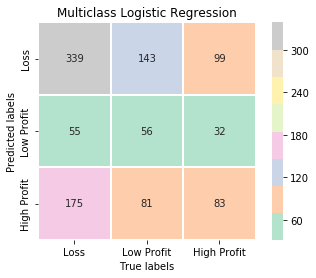

In [13]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.1.1.1.2) Decision Tree Classifier

In [14]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTC Train score: 0.5351089588377724
DTC Test score: 0.535277516462841


Text(0.5, 1, 'Decision Tree Classifier')

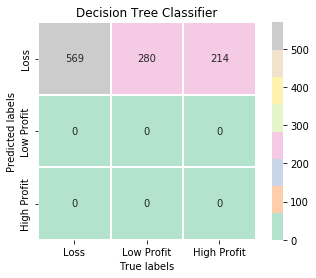

In [15]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.1.1.3) Random Forest Classifier

In [16]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 100}
RFC Train score: 1.0
RFC Test score: 0.5456255879586077


Text(0.5, 1, 'Random Forest Classifier')

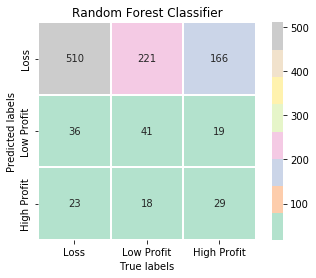

In [17]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.1.1.4) KNN Classifier

In [18]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [19]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5460048426150121
KNN Test score: 0.5390404515522107


Text(0.5, 1, 'KNN Classifier')

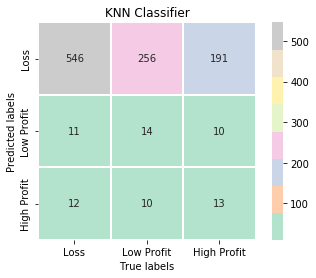

In [20]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.1.1.5) Gaussian Naive Bayes Classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5141242937853108
GNB Test score: 0.5051740357478833


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

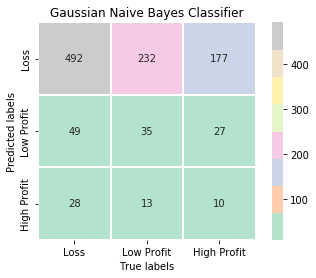

In [22]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.1.2) Seperating into 2 classes

In [23]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1    1646
Name: gross_budget_ratio, dtype: int64

In [24]:
df12 = df1.copy()
df12['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [25]:
X = df12.drop(columns=['gross_budget_ratio'])
y = df12['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 22)
Dimensionality of X_test : (1063, 22)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.1.2.1) Logistic Regression

In [26]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 0.01, 'penalty': 'l1'}
LR Train score: 0.8989441930618401
LR Test score: 0.8857644991212654
LR Test Accuracy score: 0.5465663217309501


Text(0.5, 1, 'Logistic Regression')

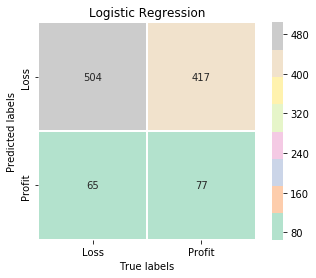

In [27]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.1.1.2.2) Decision Tree Classifier

In [28]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.5, 'min_samples_split': 0.001}
DTC Train score: 0.5565610859728507
DTC Test score: 0.6028119507908611
DTC Test Accuracy score: 0.5823142050799623


Text(0.5, 1, 'Decision Tree Classifier')

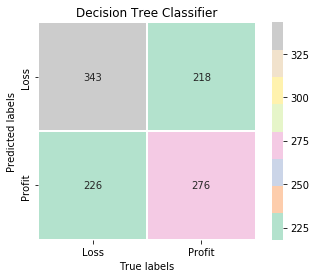

In [29]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.1.2.3) Random Forest Classifier

In [30]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.9577677224736049
RFC Test score: 0.7486818980667839
RFC Test Accuracy score: 0.6237064910630291


Text(0.5, 1, 'Random Forest Classifier')

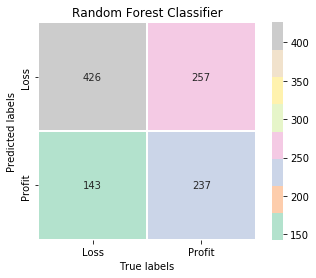

In [31]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.1.2.4) KNN Classifier

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 20}
KNN Train score: 0.7458521870286576
KNN Test score: 0.7082601054481547
KNN Test Accuracy score: 0.5954844778927564


Text(0.5, 1, 'KNN Classifier')

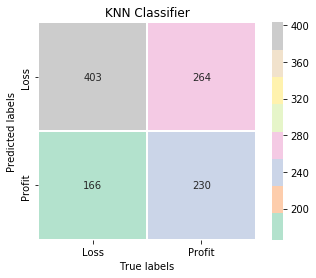

In [34]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.1.2.5) Gaussian Naive Bayes Classifier

In [35]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.533091202582728
GNB Test score: 0.5522107243650047


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

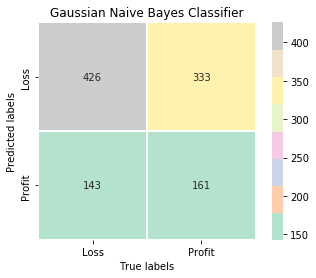

In [36]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.2) With taking log and feature elimination

### log

In [37]:
df2 = df1.copy()
df2['budget'] = np.log(df2['budget'])
df2['director_facebook_likes'] = df2['director_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_1_facebook_likes'] = df2['actor_1_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_2_facebook_likes'] = df2['actor_2_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_3_facebook_likes'] = df2['actor_3_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['cast_total_facebook_likes'] = df2['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [38]:
df2.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others', 'gross_budget_ratio', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [39]:
df2 = df2.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

## 1.1.2.1) Seperating into 3 classes

In [40]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1     934
2     712
Name: gross_budget_ratio, dtype: int64

In [41]:
df21 = df2.copy()
df21['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [42]:
df21

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,budget,actor_2_facebook_likes,Comedy,Drama,Romance,Family_Animation,Action_Adventure,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,6.100319,6.710523,9.903488,10.008253,17.686712,6.907755,1,0,1,0,0,0,0,0,1,0
3,148.0,6.467699,5.786897,6.907755,7.850104,17.111347,6.695799,1,0,0,0,1,1,2,0,0,1
5,124.0,3.737670,5.081404,6.685861,7.287561,16.811243,5.159055,1,0,0,0,0,1,0,1,0,0
6,124.0,5.010635,6.349139,6.773080,7.888710,17.760281,6.704414,0,1,0,0,0,1,1,1,0,0
7,104.0,0.000000,6.248043,6.625392,7.800573,15.687313,6.340359,0,0,1,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,3.555348,6.159095,8.294050,8.797397,15.424948,6.744059,0,1,0,0,0,0,0,0,1,0
3847,92.0,4.488636,5.247024,9.740969,9.790319,17.370859,5.796058,1,0,0,0,0,0,1,0,0,1
3848,100.0,3.178054,6.746412,9.615805,9.840867,16.811243,6.907755,1,0,0,0,0,0,2,0,0,1
3849,92.0,4.488636,5.872118,6.591674,7.954372,15.424948,6.559615,1,0,0,0,0,0,2,0,0,1


In [43]:
X = df21.drop(columns=['gross_budget_ratio'])
y = df21['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 16)
Dimensionality of X_test : (1063, 16)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.2.1.1) Multi-Class Logistic Regression

In [44]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [45]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.1, 'penalty': 'l2'}
MLR Train score: 0.5359477124183006
MLR Test score: 0.4628410159924741


Text(0.5, 1, 'Multiclass Logistic Regression')

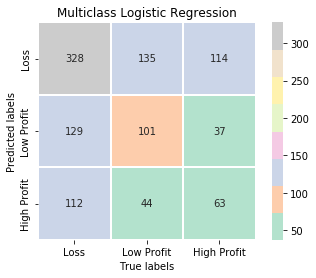

In [46]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.1.2.1.2) Decision Tree Classifier

In [47]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTC Train score: 0.5351089588377724
DTC Test score: 0.535277516462841


Text(0.5, 1, 'Decision Tree Classifier')

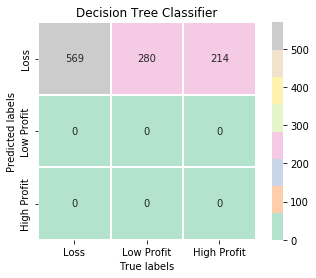

In [48]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.2.1.3) Random Forest Classifier

In [49]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
RFC Train score: 0.8038740920096852
RFC Test score: 0.5390404515522107


Text(0.5, 1, 'Random Forest Classifier')

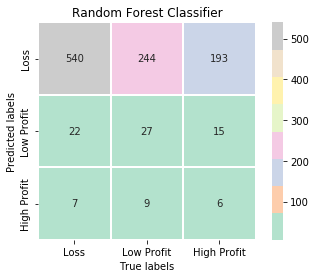

In [50]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.2.1.4) KNN Classifier

In [51]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [52]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5540758676351897
KNN Test score: 0.5258701787394168


Text(0.5, 1, 'KNN Classifier')

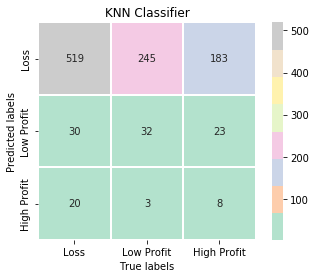

In [53]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.2.1.5) Gaussian Naive Bayes Classifier

In [54]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.4947538337368846
GNB Test score: 0.5004703668861712


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

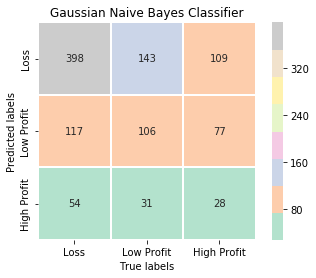

In [55]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.2.2) Seperating into 2 classes

In [56]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1    1646
Name: gross_budget_ratio, dtype: int64

In [57]:
df22 = df2.copy()
df22['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [58]:
X = df22.drop(columns=['gross_budget_ratio'])
y = df22['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 16)
Dimensionality of X_test : (1063, 16)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.2.2.1) Logistic Regression

In [59]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 0.001, 'penalty': 'l1'}
LR Train score: 1.0
LR Test score: 1.0
LR Test Accuracy score: 0.535277516462841


Text(0.5, 1, 'Logistic Regression')

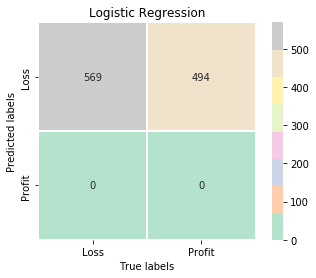

In [60]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.1.2.2.2) Decision Tree Classifier

In [61]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.5, 'min_samples_split': 0.001}
DTC Train score: 0.5565610859728507
DTC Test score: 0.6028119507908611
DTC Test Accuracy score: 0.5823142050799623


Text(0.5, 1, 'Decision Tree Classifier')

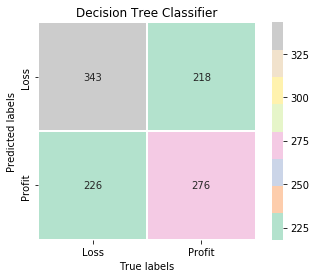

In [62]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.2.2.3) Random Forest Classifier

In [63]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
RFC Train score: 0.9457013574660633
RFC Test score: 0.7100175746924429
RFC Test Accuracy score: 0.6105362182502352


Text(0.5, 1, 'Random Forest Classifier')

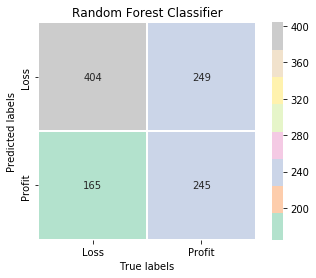

In [64]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.2.2.4) KNN Classifier

In [65]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [66]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7918552036199095
KNN Test score: 0.6818980667838312
KNN Test Accuracy score: 0.5653809971777987


Text(0.5, 1, 'KNN Classifier')

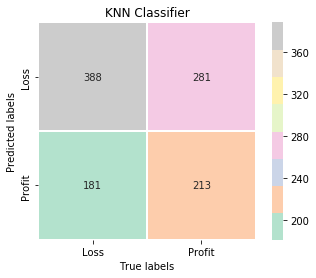

In [67]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.2.2.5) Gaussian Naive Bayes Classifier

In [68]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5605326876513317
GNB Test score: 0.6077140169332079


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

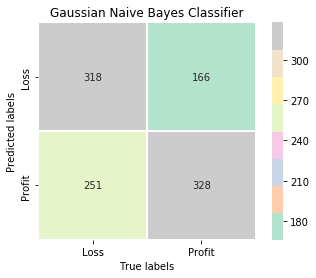

In [69]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2) Only US and UK Movies

In [70]:
classification2_df= classification_df.copy()
classification2_df = classification2_df[(classification2_df.country=='USA') | (classification2_df.country=='UK')]
classification2_df = classification2_df[(classification2_df.language=='English')]
classification2_df=classification2_df.drop(columns=['country','language'])
df3 = pd.get_dummies(classification2_df, columns=['content_rating'])
df3 = df3.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
df3 = df3[df3.gross_budget_ratio<=5]
df3

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0.981155,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2.007407,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0.100000,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1.546517,1,0,0
7,104.0,0.0,517.0,754.0,2442,0.0,6.500000e+06,567.0,0,0,...,1,0,0,0,0,0,4.907538,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0.940072,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1.579766,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2.773065,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2.335036,0,0,1


## 1.2.1) Without log and feature elimination

## 1.2.1.1) Seperating into 3 classes

In [71]:
RatioClass = df3['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1526
1     860
2     667
Name: gross_budget_ratio, dtype: int64

In [72]:
df31 = df3.copy()
df31['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [73]:
df31

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1,1,0,0
7,104.0,0.0,517.0,754.0,2442,0.0,6.500000e+06,567.0,0,0,...,1,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2,0,0,1


In [74]:
X = df31.drop(columns=['gross_budget_ratio'])
y = df31['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 22)
Dimensionality of X_test : (916, 22)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.1.1.1) Multi-Class Logistic Regression

In [75]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [76]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.1, 'penalty': 'l2'}
MLR Train score: 0.4288389513108614
MLR Test score: 0.3951965065502183


Text(0.5, 1, 'Multiclass Logistic Regression')

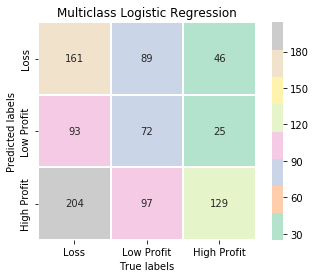

In [77]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.2.1.1.2) Decision Tree Classifier

In [78]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.025, 'min_samples_split': 0.1}
DTC Train score: 0.5128685072531586
DTC Test score: 0.47925764192139736


Text(0.5, 1, 'Decision Tree Classifier')

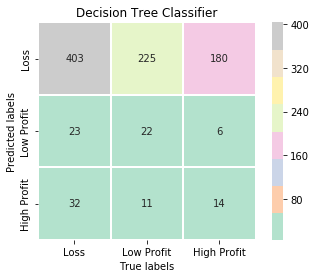

In [79]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.1.1.3) Random Forest Classifier

In [80]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
RFC Train score: 1.0
RFC Test score: 0.5010917030567685


Text(0.5, 1, 'Random Forest Classifier')

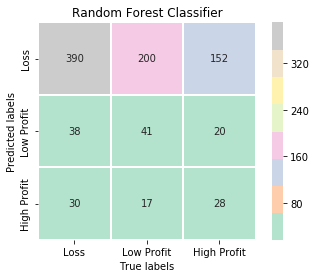

In [81]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.1.1.4) KNN Classifier

In [82]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [83]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 20}
KNN Train score: 0.5521759475900796
KNN Test score: 0.47707423580786024


Text(0.5, 1, 'KNN Classifier')

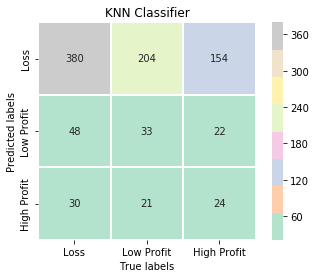

In [84]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.1.1.5) Gaussian Naive Bayes Classifier

In [85]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.49368273280299485
GNB Test score: 0.47925764192139736


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

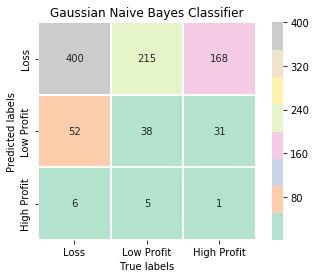

In [86]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.1.2) Seperating into 2 classes

In [87]:
RatioClass = df3['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1527
0    1526
Name: gross_budget_ratio, dtype: int64

In [88]:
df32 = df3.copy()
df32['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [89]:
X = df32.drop(columns=['gross_budget_ratio'])
y = df32['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 22)
Dimensionality of X_test : (916, 22)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.1.2.1) Logistic Regression

In [90]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 10, 'penalty': 'l1'}
LR Train score: 0.6320224719101124
LR Test score: 0.5960698689956332
LR Test Accuracy score: 0.5655021834061136


Text(0.5, 1, 'Logistic Regression')

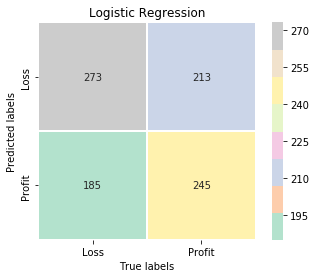

In [91]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.2.1.2.2) Decision Tree Classifier

In [92]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 0.1, 'min_samples_split': 0.99}
DTC Train score: 0.5936329588014981
DTC Test score: 0.6048034934497817
DTC Test Accuracy score: 0.5524017467248908


Text(0.5, 1, 'Decision Tree Classifier')

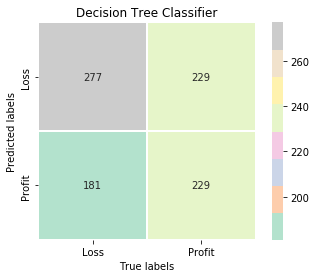

In [93]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.1.2.3) Random Forest Classifier

In [94]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}
RFC Train score: 1.0
RFC Test score: 0.611353711790393
RFC Test Accuracy score: 0.5720524017467249


Text(0.5, 1, 'Random Forest Classifier')

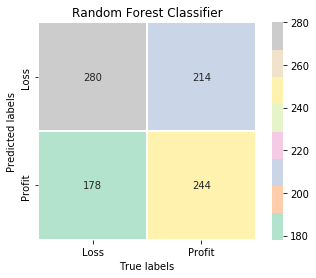

In [95]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.1.2.4) KNN Classifier

In [96]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [97]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7668539325842697
KNN Test score: 0.6790393013100436
KNN Test Accuracy score: 0.5469432314410481


Text(0.5, 1, 'KNN Classifier')

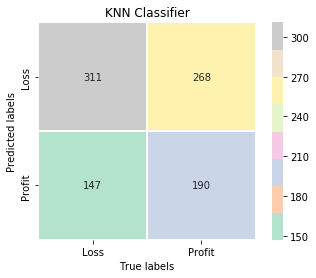

In [98]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.1.2.5) Gaussian Naive Bayes Classifier

In [99]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5236312587739822
GNB Test score: 0.5163755458515283


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

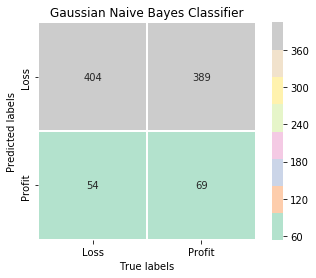

In [100]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.2) With taking log and feature elimination

### log

In [101]:
df4 = df3.copy()
df4['budget'] = np.log(df4['budget'])
df4['director_facebook_likes'] = df4['director_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_1_facebook_likes'] = df4['actor_1_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_2_facebook_likes'] = df4['actor_2_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_3_facebook_likes'] = df4['actor_3_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['cast_total_facebook_likes'] = df4['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [102]:
df4.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others', 'gross_budget_ratio', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [103]:
df4 = df4.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

## 1.2.2.1) Seperating into 3 classes

In [104]:
RatioClass = df4['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1526
1     860
2     667
Name: gross_budget_ratio, dtype: int64

In [105]:
df41 = df4.copy()
df41['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [106]:
df41

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,budget,actor_2_facebook_likes,Comedy,Drama,Romance,Family_Animation,Action_Adventure,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,6.100319,6.710523,9.903488,10.008253,17.686712,6.907755,1,0,1,0,0,0,0,0,1,0
3,148.0,6.467699,5.786897,6.907755,7.850104,17.111347,6.695799,1,0,0,0,1,1,2,0,0,1
5,124.0,3.737670,5.081404,6.685861,7.287561,16.811243,5.159055,1,0,0,0,0,1,0,1,0,0
6,124.0,5.010635,6.349139,6.773080,7.888710,17.760281,6.704414,0,1,0,0,0,1,1,1,0,0
7,104.0,0.000000,6.248043,6.625392,7.800573,15.687313,6.340359,0,0,1,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,3.555348,6.159095,8.294050,8.797397,15.424948,6.744059,0,1,0,0,0,0,0,0,1,0
3847,92.0,4.488636,5.247024,9.740969,9.790319,17.370859,5.796058,1,0,0,0,0,0,1,0,0,1
3848,100.0,3.178054,6.746412,9.615805,9.840867,16.811243,6.907755,1,0,0,0,0,0,2,0,0,1
3849,92.0,4.488636,5.872118,6.591674,7.954372,15.424948,6.559615,1,0,0,0,0,0,2,0,0,1


In [107]:
X = df41.drop(columns=['gross_budget_ratio'])
y = df41['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 16)
Dimensionality of X_test : (916, 16)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.2.1.1) Multi-Class Logistic Regression

In [108]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [109]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.01, 'penalty': 'l2'}
MLR Train score: 0.5093632958801498
MLR Test score: 0.4432314410480349


Text(0.5, 1, 'Multiclass Logistic Regression')

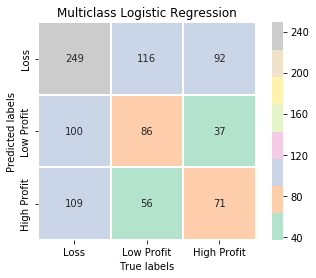

In [110]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.2.2.1.2) Decision Tree Classifier

In [111]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.99}
DTC Train score: 0.49976602714085167
DTC Test score: 0.5


Text(0.5, 1, 'Decision Tree Classifier')

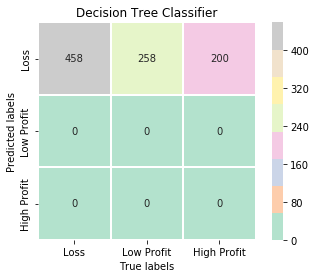

In [112]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.2.1.3) Random Forest Classifier

In [113]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.8600842302292934
RFC Test score: 0.49672489082969434


Text(0.5, 1, 'Random Forest Classifier')

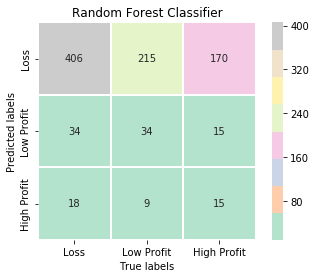

In [114]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.2.1.4) KNN Classifier

In [115]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [116]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5208235844642022
KNN Test score: 0.4759825327510917


Text(0.5, 1, 'KNN Classifier')

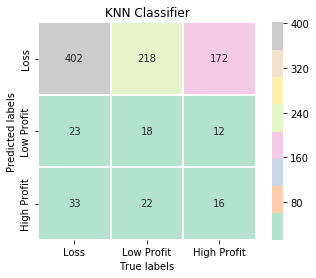

In [117]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.2.1.5) Gaussian Naive Bayes Classifier

In [118]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.47496490407112774
GNB Test score: 0.4705240174672489


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

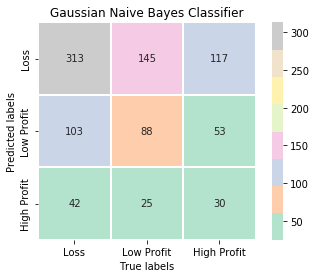

In [119]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.2.2) Seperating into 2 classes

In [120]:
RatioClass = df4['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1527
0    1526
Name: gross_budget_ratio, dtype: int64

In [121]:
df42 = df4.copy()
df42['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [122]:
X = df42.drop(columns=['gross_budget_ratio'])
y = df42['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 16)
Dimensionality of X_test : (916, 16)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.2.2.1) Logistic Regression

In [123]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 10, 'penalty': 'l2'}
LR Train score: 0.596441947565543
LR Test score: 0.5873362445414847
LR Test Accuracy score: 0.5545851528384279


Text(0.5, 1, 'Logistic Regression')

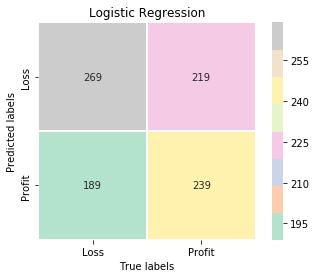

In [124]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.2.2.2.2) Decision Tree Classifier

In [125]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 0.1, 'min_samples_split': 0.99}
DTC Train score: 0.5936329588014981
DTC Test score: 0.6048034934497817
DTC Test Accuracy score: 0.5524017467248908


Text(0.5, 1, 'Decision Tree Classifier')

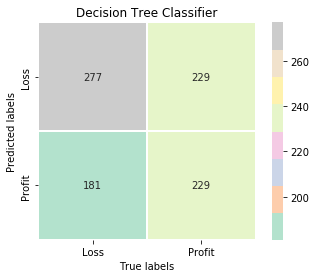

In [126]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.2.2.3) Random Forest Classifier

In [127]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}
RFC Train score: 1.0
RFC Test score: 0.5807860262008734
RFC Test Accuracy score: 0.5611353711790393


Text(0.5, 1, 'Random Forest Classifier')

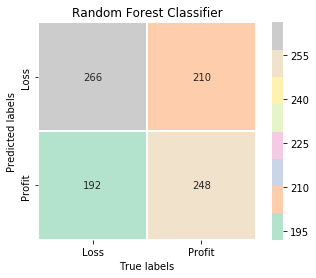

In [128]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.2.2.4) KNN Classifier

In [129]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [130]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7312734082397003
KNN Test score: 0.6331877729257642
KNN Test Accuracy score: 0.5403930131004366


Text(0.5, 1, 'KNN Classifier')

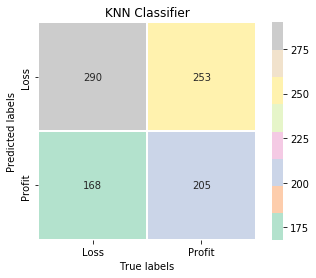

In [131]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.2.2.5) Gaussian Naive Bayes Classifier

In [132]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5713617220402434
GNB Test score: 0.5731441048034934


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

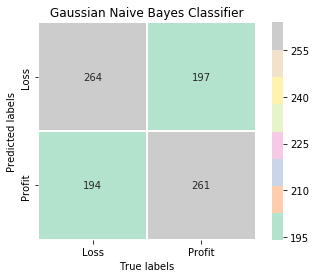

In [133]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')